<a href="https://colab.research.google.com/github/DianaShramchenko/data_mining/blob/main/%D0%BF%D1%809.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическая работа №9. Ансамблевые методы в машинном обучении**

## **Задание №1: Классификация лиц из набора данных Olivetti Faces с помощью алгоритмов градиентного бустинга**

В этом задании мы применим несколько популярных алгоритмов градиентного бустинга - CatBoost, LightGBM, XGBoost и GradientBoosting из библиотеки scikit-learn для решения задачи классификации лиц из набора данных Olivetti Faces. Цель - определить, какому человеку принадлежит новое изображение лица, на основе обучения на размеченных данных.





Шаги выполнения задания:

1. Загрузите набор данных Olivetti Faces с помощью функции `fetch_olivetti_faces()` из scikit-learn.

2. Разделите данные на обучающую и тестовую выборки с помощью `train_test_split()`.

3. Выполните предобработку изображений:
   - Преобразуйте изображения в вектора признаков (flatten)
   - Нормализуйте значения пикселей (разделите на 255)

4. Создайте и обучите модели градиентного бустинга:
   - CatBoostClassifier
   - LGBMClassifier
   - XGBClassifier
   - GradientBoostingClassifier

5. Оцените качество классификации каждой модели на тестовой выборке, используя метрику accuracy, отчет классификации и построение матрицы ошибок.

6. Сравните точность и время обучения разных алгоритмов. Определите, какой из них лучше подходит для данной задачи.

7. Сделайте выводы о сравнительной эффективности разных алгоритмов градиентного бустинга для классификации лиц.

Датасет: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html

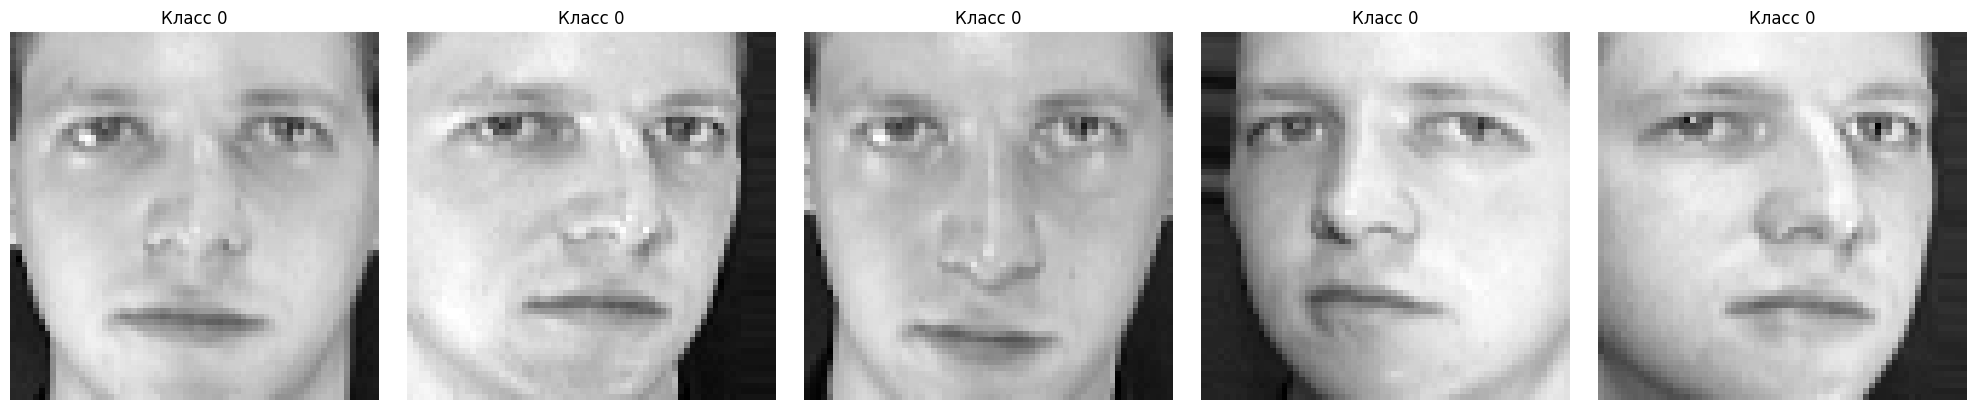

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# 1. Загрузка датасета
faces = fetch_olivetti_faces()
images = faces.images  # Изображения размером 64x64
labels = faces.target  # Метки классов (номера людей)

# Отображение первых пяти изображений и их классов
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i in range(5):
    image = images[i]
    label = labels[i]
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Класс {label}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# 2. Разделение данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
X = faces.images
y = faces.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# 3. Выполните предобработку изображений
# Преобразование изображений в вектора признаков (flatten)
# https://numpy.org/doc/stable/reference/generated/numpy.reshape.html
# https://stepik.org/lesson/673455/step/1
# Нормализация значений пикселей
X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_flat = X_test.reshape(X_test.shape[0], -1) / 255.0

X_train_flat.shape

(320, 4096)

In [ ]:
import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# 4. Создайте и обучите модели градиентного бустинга:
# CatBoostClassifier
!pip install catboost
from catboost import CatBoostClassifier
results_1 = {}
start_time = time.time()
model_1 = CatBoostClassifier(
    iterations=50,
    learning_rate=0.1,
    depth=5,
    verbose=0
)
model_1.fit(X_train_flat, y_train)
training_time_1 = time.time() - start_time
y_pred_1 = model_1.predict(X_test_flat)
accuracy_1 = model_1.score(X_test_flat, y_test)
results_1['CatBoostClassifier'] = {'Точность': accuracy_1, 'training_time': training_time_1}

In [ ]:
print(f"Точность: {accuracy_1:.2f}")
print(f"Время обучения: {training_time_1:.2f}")

Точность: 0.80
Время обучения: 309.82


In [ ]:
# LightGBM
!pip install lightgbm
from lightgbm import LGBMClassifier
start_time = time.time()
model_2 = LGBMClassifier(
    n_estimators=50,
    learning_rate=0.1,
    max_depth=5
)
model_2.fit(X_train_flat, y_train)
training_time_2 = time.time() - start_time
y_pred_2 = model_2.predict(X_test_flat)
accuracy_2 = model_2.score(X_test_flat, y_test)
results_1['LightGBM'] = {'Точность': accuracy_2, 'training_time': training_time_2}

In [ ]:
print(f"Точность: {accuracy_2:.2f}")
print(f"Время обучения: {training_time_2:.2f}")

Точность: 0.78
Время обучения: 93.26


In [ ]:
# XGBClassifier
from xgboost import XGBClassifier
start_time = time.time()
model_3 = XGBClassifier(
    n_estimators=50,
    learning_rate=0.1,
    max_depth=5,
    use_label_encoder=False,  # отключение предупреждений
    eval_metric='mlogloss'    # установка метрики для логирования
)
model_3.fit(X_train_flat, y_train)
training_time_3 = time.time() - start_time
y_pred_3 = model_3.predict(X_test_flat)
accuracy_3 = model_3.score(X_test_flat, y_test)
results_1['XGBClassifier'] = {'Точность': accuracy_3, 'training_time': training_time_3}

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:38:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
print(f"Точность: {accuracy_3:.2f}")
print(f"Время обучения: {training_time_3:.2f}")

Точность: 0.74
Время обучения: 122.96


In [ ]:
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
start_time = time.time()
model_4 = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=0.1,
    max_depth=5
)
model_4.fit(X_train_flat, y_train)
training_time_4 = time.time() - start_time
y_pred_4 = model_4.predict(X_test_flat)
accuracy_4 = model_4.score(X_test_flat, y_test)
results_1['GradientBoostingClassifier'] = {'Точность': accuracy_4, 'training_time': training_time_4}

In [ ]:
print(f"Точность: {accuracy_4:.2f}")
print(f"Время обучения: {training_time_4:.2f}")

Точность: 0.56
Время обучения: 1374.85


In [ ]:
classification_reports = {}
report_1 = classification_report(y_test, y_pred_1)
classification_reports['CatBoostClassifier'] = report_1

report_2 = classification_report(y_test, y_pred_2)
classification_reports['LightGBM'] = report_2

report_3 = classification_report(y_test, y_pred_3)
classification_reports['XGBClassifier'] = report_3

report_4 = classification_report(y_test, y_pred_4)
classification_reports['GradientBoostingClassifier'] = report_4

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
for model, report in classification_reports.items():
    print(f"\n{model} Classification Report:")
    print(report)


CatBoostClassifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         1
           5       0.50      1.00      0.67         1
           6       0.50      0.67      0.57         3
           7       0.00      0.00      0.00         1
           8       0.75      1.00      0.86         3
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         2
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       1.00      1.00     

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'CatBoostClassifier')

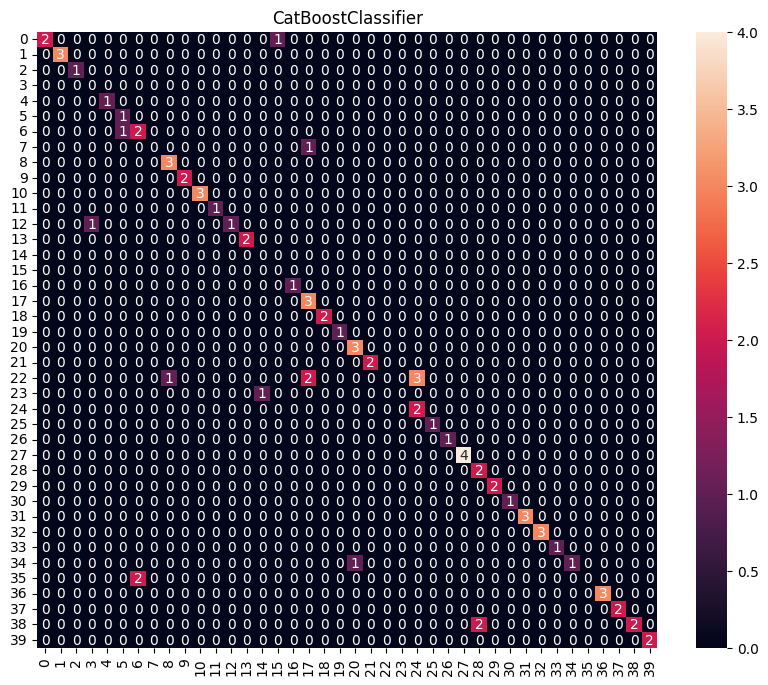

In [ ]:
conf_mat_1=confusion_matrix(y_test, y_pred_1)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat_1,annot=True,fmt='d')
plt.title('CatBoostClassifier')

Text(0.5, 1.0, 'LightGBM')

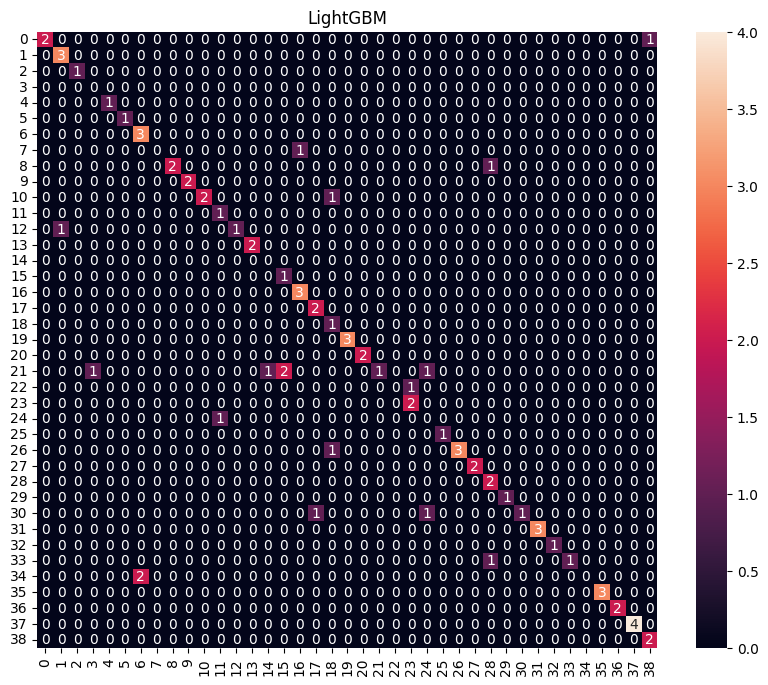

In [ ]:
conf_mat_2=confusion_matrix(y_test, y_pred_2)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat_2,annot=True,fmt='d')
plt.title('LightGBM')

Text(0.5, 1.0, 'XGBClassifier')

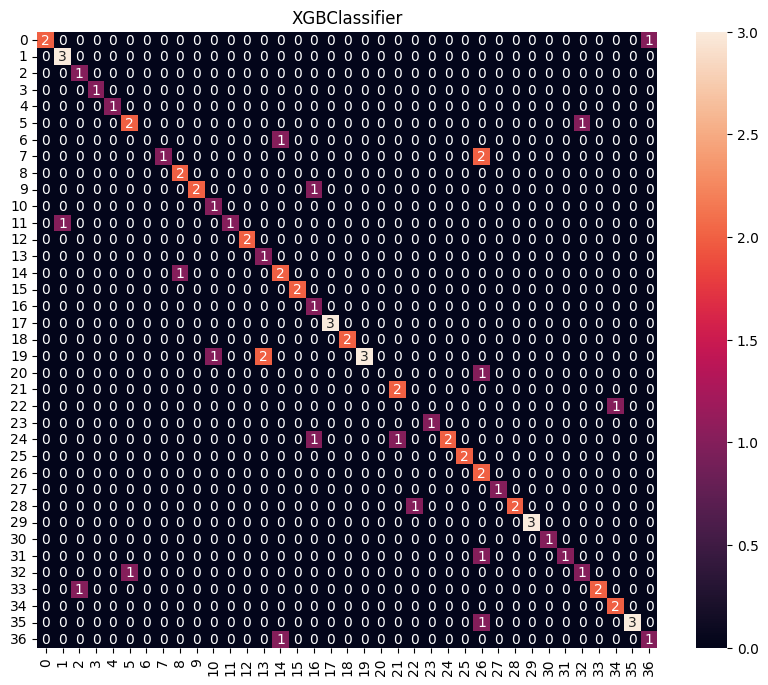

In [ ]:
conf_mat_3=confusion_matrix(y_test, y_pred_3)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat_3,annot=True,fmt='d')
plt.title('XGBClassifier')

Text(0.5, 1.0, 'GradientBoostingClassifier')

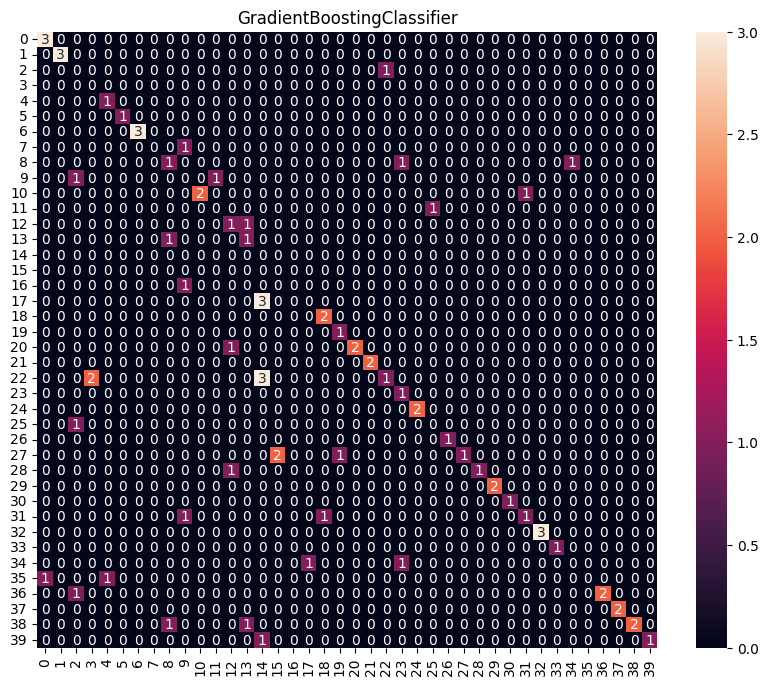

In [ ]:
conf_mat_4=confusion_matrix(y_test, y_pred_4)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat_4,annot=True,fmt='d')
plt.title('GradientBoostingClassifier')

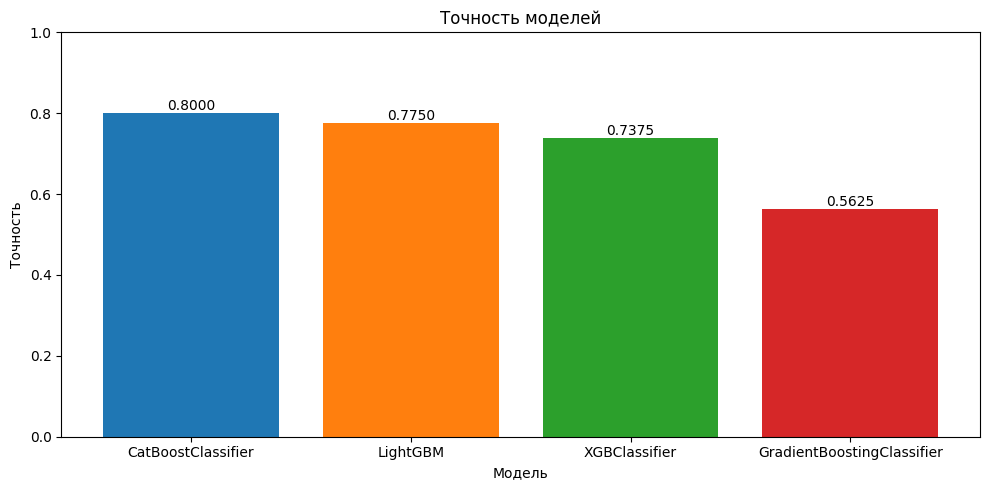

In [ ]:
import matplotlib.pyplot as plt

models = list(results_1.keys())
accuracies = [results_1[model]['Точность'] for model in models]
training_times = [results_1[model]['training_time'] for model in models]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Цвета для столбиков

# Построение графика точности моделей
plt.figure(figsize=(10, 5))
bars = plt.bar(models, accuracies, color=colors)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{accuracies[i]:.4f}', ha='center', va='bottom')
plt.title('Точность моделей')
plt.xlabel('Модель')
plt.ylabel('Точность')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

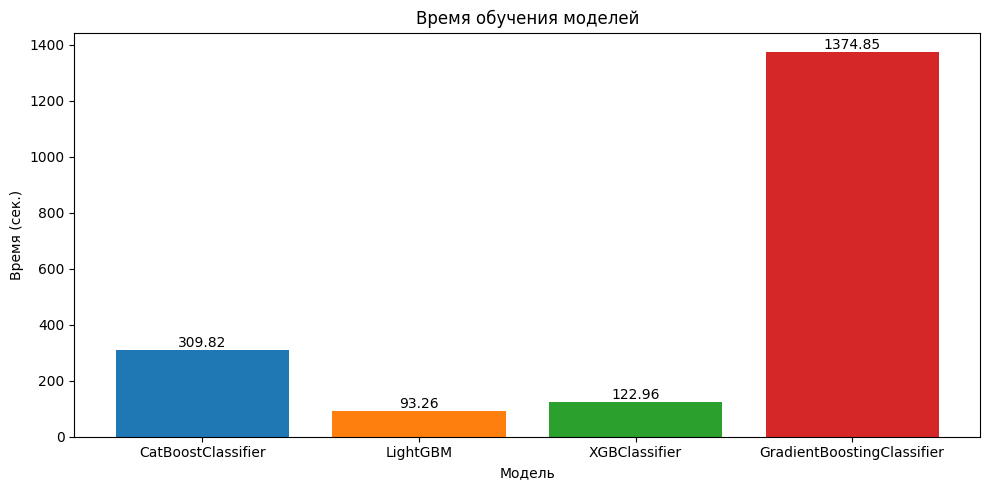

In [ ]:
# Построение графика времени обучения моделей
plt.figure(figsize=(10, 5))
bars = plt.bar(models, training_times, color=colors)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{training_times[i]:.2f}',
             ha='center', va='bottom', fontsize=10)
plt.title('Время обучения моделей')
plt.xlabel('Модель')
plt.ylabel('Время (сек.)')
plt.tight_layout()
plt.show()

## **Задание №2: Предсказание нижней половины лица по верхней с помощью алгоритмов градиентного бустинга**




- В этом задании мы применим алгоритмы градиентного бустинга - CatBoost, LightGBM, XGBoost и GradientBoostingRegressor - для решения интересной задачи регрессии на датасете лиц Olivetti Faces. Цель - предсказать значения пикселей нижней половины лица по пикселям верхней половины.

- Каждое изображение лица представляет собой матрицу 64x64 в оттенках серого. Мы разделим изображения на верхнюю и нижнюю половины и будем предсказывать значения яркости пикселей нижней половины по значениям верхней.

- Сравним качество (по метрике R^2) и время обучения разных реализаций градиентного бустинга на этой задаче восстановления изображений. Посмотрим, насколько хорошо алгоритмы бустинга смогут достроить нижнюю часть лица по верхней.

Датасет: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


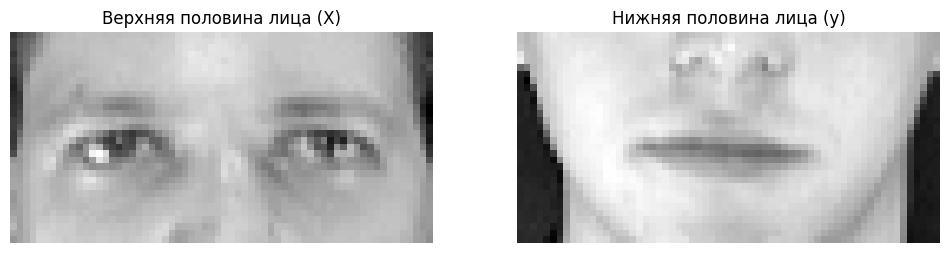

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# Загрузка датасета
faces = fetch_olivetti_faces()
images = faces.images  # Изображения размером 64x64
n_samples = images.shape[0]

# Разделение изображений на верхнюю и нижнюю половины
upper_half = images[:, :32, :]  # Верхняя половина (первые 32 строки)
lower_half = images[:, 32:, :]  # Нижняя половина (последние 32 строки)

# Преобразование 2D изображений в 1D векторы
X = upper_half.reshape((n_samples, -1))
y = lower_half.reshape((n_samples, -1))

# Выбор одного примера для отображения
sample_index = 0  # Измените значение для выбора другого изображения

# Восстановление изображений из векторов
upper_face = X[sample_index].reshape(32, 64)
lower_face = y[sample_index].reshape(32, 64)

# Отображение верхней и нижней половин лица
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(upper_face, cmap='gray')
axes[0].set_title('Верхняя половина лица (X)')
axes[0].axis('off')

axes[1].imshow(lower_face, cmap='gray')
axes[1].set_title('Нижняя половина лица (y)')
axes[1].axis('off')

plt.show()

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 3.7 MB/s eta 0:00:00


In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score
from sklearn.multioutput import MultiOutputRegressor
#https://machinelearningmastery.com/multi-output-regression-models-with-python/
# https://www.geeksforgeeks.org/multioutput-regression-in-machine-learning/

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# Используем подвыборку данных для ускорения
sample = 0.3
sample_size = int(len(X_train) * sample)
sample_random = np.random.choice(len(X_train), size=sample_size, replace=False)
X_train_sample = X_train[sample_random]
y_train_sample = y_train[sample_random]

In [ ]:
# CatBoostRegressor
# Словарь для хранения результатов
results = {}
start_time = time.time()
# Создание и обучение модели
model_cbr = MultiOutputRegressor(CatBoostRegressor(iterations=30, #Максимальное количество деревьев
                                                  learning_rate=0.1, #Темп обучения (также известен как скорость сходимости)
                                                  depth=3, #Глубина дерева
                                                  thread_count=-1,
                                                  verbose=0))
model_cbr.fit(X_train_sample, y_train_sample)
training_time_cbr = time.time() - start_time

y_pred_cbr = model_cbr.predict(X_test)
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html и https://habr.com/ru/articles/558084/
r2_cbr = r2_score(y_test, y_pred_cbr)

results['CatBoostRegressor'] = {'R^2': r2_cbr, 'training_time': training_time_cbr}

In [ ]:
results['CatBoostRegressor'] = {'R^2': r2_cbr, 'training_time': training_time_cbr}

In [ ]:
print("R^2:", r2_cbr)
print("Training time:", training_time_cbr)

R^2: 0.36947113086452543
Training time: 2606.0529544353485


In [ ]:
# LightGBM
from lightgbm import LGBMRegressor
start_time = time.time()
model_lgbm = MultiOutputRegressor(LGBMRegressor(n_estimators=50,
                                                #max_depth=5,
                                                learning_rate=0.1,
                                                num_leaves=30,
                                                verbose=-1))
model_lgbm.fit(X_train_sample, y_train_sample)
training_time_lgbm = time.time() - start_time
y_pred_lgbm = model_lgbm.predict(X_test)
r2_lgbm = r2_score(y_test, y_pred_lgbm)
results['LightGBM'] = {'R^2': r2_lgbm, 'training_time': training_time_lgbm}

In [ ]:
print("R^2:", r2_lgbm)
print("Training time:", training_time_lgbm)

R^2: 0.3931674522485685
Training time: 839.6401650905609


In [ ]:
from xgboost import XGBRegressor
start_time = time.time()
model_xgb = MultiOutputRegressor(XGBRegressor(n_estimators=25,
                                              learning_rate=0.1,
                                              max_depth=3,
                                              tree_method='hist',
                                              n_jobs=-1))
model_xgb.fit(X_train_sample, y_train_sample)
train_time_xgb = time.time() - start_time
y_pred_xgb = model_xgb.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
results['XGBRegressor'] = {'R^2': r2_xgb, 'training_time': train_time_xgb}

In [ ]:
print("R^2:", r2_xgb)
print("Training time:", train_time_xgb)

R^2: 0.3748934268951416
Training time: 1870.822591304779


In [ ]:
# GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
start_time = time.time()
model_gdr = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=30,
                                                           learning_rate=0.1,
                                                           max_depth=5))
model_gdr.fit(X_train_sample, y_train_sample)
train_time_gdr = time.time() - start_time
y_pred_gdr  = model_gdr.predict(X_test)
r2_gdr = r2_score(y_test, y_pred_gdr)

In [ ]:
results['GradientBoostingRegressor'] = {'R^2': r2_gdr, 'training_time': train_time_gdr}

In [ ]:
print("R^2:", r2_gdr)
print("Training time:", train_time_gdr)

R^2: 0.28359759899233106
Training time: 6057.659834861755


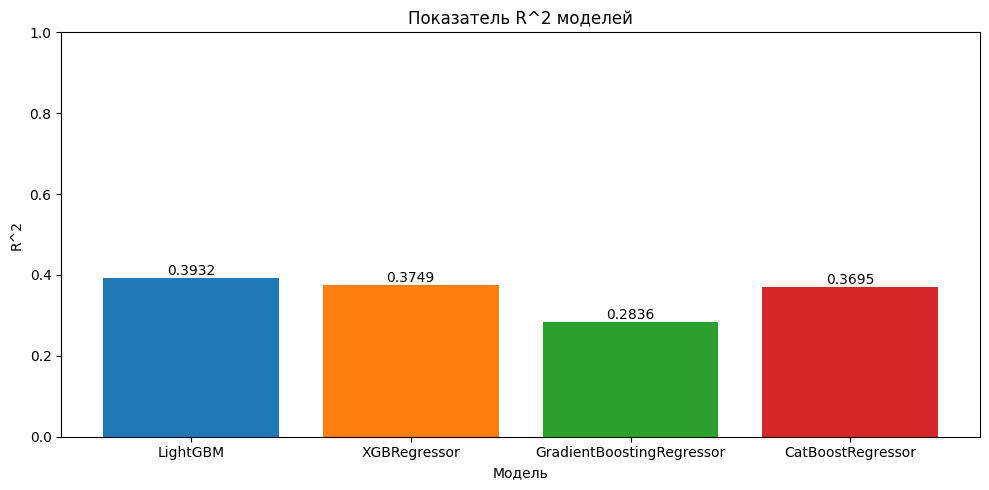

In [ ]:
# Построение графиков
models = list(results.keys())
r2_scores = [results[model]['R^2'] for model in models]
training_times = [results[model]['training_time'] for model in models]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Цвета для столбиков

# Построение графика R^2
plt.figure(figsize=(10, 5))
bars = plt.bar(models, r2_scores, color=colors)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{r2_scores[i]:.4f}', ha='center', va='bottom')
plt.title('Показатель R^2 моделей')
plt.xlabel('Модель')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

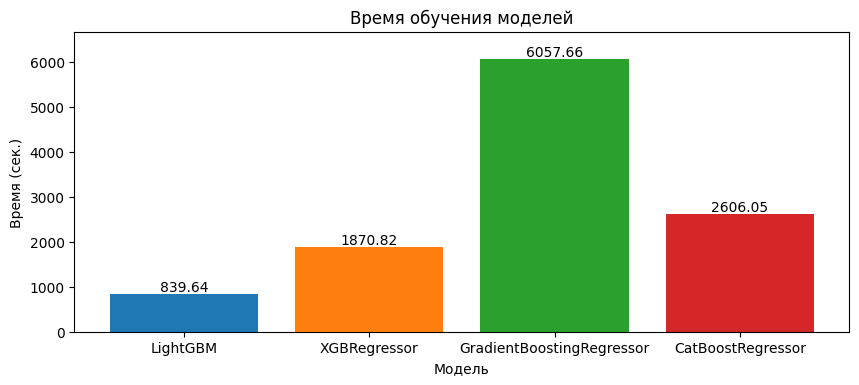

In [ ]:
# Построение графика времени обучения
plt.figure(figsize=(10, 5))
bars = plt.bar(models, training_times, color=colors)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{training_times[i]:.2f}',
             ha='center', va='bottom', fontsize=10)
plt.title('Время обучения моделей')
plt.xlabel('Модель')
plt.ylabel('Время (cек.)')
plt.ylim(0, max(training_times) * 1.1)  # Ограничение по y для визуализации
plt.subplots_adjust(bottom=0.2, top=0.8)  # Настройка отступов
plt.show()

## **Задание №3: Классификация лиц из набора Olivetti Faces с помощью ансамбля классификаторов VotingClassifier**



- В этом задании мы применим ансамблевый метод классификации VotingClassifier из библиотеки scikit-learn для решения задачи распознавания лиц из набора данных Olivetti Faces. VotingClassifier объединяет предсказания нескольких базовых классификаторов путем голосования, что позволяет улучшить качество классификации по сравнению с отдельными моделями

- Мы будем использовать несколько "слабых" классификаторов, таких как LogisticRegression, DecisionTreeClassifier и KNeighborsClassifier, NaiveBayes и объединим их в ансамбль с помощью VotingClassifier. Затем сравним точность ансамбля с отдельными базовыми моделями и оценим эффект от их комбинирования.



- Не забудьте предварительно обработать изображения перед подачей в модели:
  - Преобразовать изображения в вектора признаков (flatten)
  - Нормализовать значения пикселей (разделить на 255)

- После обучения, оцените качество классификации каждой модели на тестовой выборке, используя метрику accuracy, отчет классификации и построение матрицы ошибок.

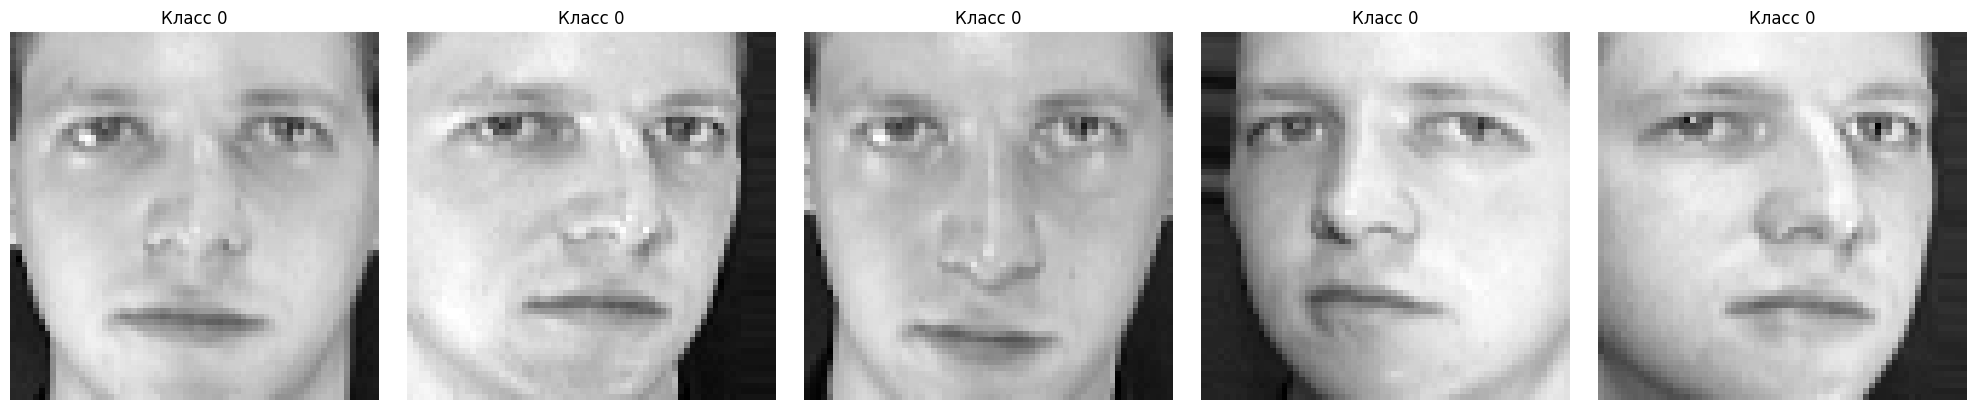

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# Загрузка датасета
faces = fetch_olivetti_faces()
images = faces.images  # Изображения размером 64x64
labels = faces.target  # Метки классов (номера людей)

# Отображение первых пяти изображений и их классов
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i in range(5):
    image = images[i]
    label = labels[i]
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Класс {label}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# 2. Разделение данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
X = faces.images
y = faces.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_flat = X_test.reshape(X_test.shape[0], -1) / 255.0

X_train_flat.shape

(320, 4096)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# Бэггинговые ансамблевые модели
from sklearn.ensemble import VotingClassifier

from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# Стандартизация признаков для моделей, чувствительных к масштабу
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

In [ ]:
# Определение базовых моделей
log_reg = LogisticRegression(max_iter=1000, random_state=42)
dt = DecisionTreeClassifier(random_state=1)
knn = KNeighborsClassifier()
nb = GaussianNB()

In [ ]:
# Определение бэггинговых ансамблевых моделей
# Ансамбль с мягким голосованием (VotingClassifier)
voting = VotingClassifier(
    estimators=[('log_reg', log_reg), ('dt', dt), ('knn', knn), ('nb', nb)],
    voting='soft'  # Используем вероятности классов
)

# Словарь всех моделей
models = {
    'Логистическая регрессия': log_reg,
    'Дерево решений': dt,
    'KNN': knn,
    'Наивный Байес': nb,
    'Ансамбль (Voting)': voting
}

In [ ]:
# Обучение моделей
for name, model in models.items():
    print(f"Обучение модели {name}...")
    if name == 'Ансамбль (Voting)':
        model.fit(X_train_scaled, y_train)
    else:
        model.fit(X_train_flat, y_train)

Обучение модели Логистическая регрессия...
Обучение модели Дерево решений...
Обучение модели KNN...
Обучение модели Наивный Байес...
Обучение модели Ансамбль (Voting)...


In [ ]:
# Предсказание и оценка моделей
# Оценка точности моделей
accuracies = {}
for name, model in models.items():
    if name == 'Логистическая регрессия':
      y_pred_log_reg = log_reg.predict(X_test_scaled)
      accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
      accuracies[name] = accuracy_log_reg
    elif name == 'Ансамбль (Voting)':  # Для ансамбля с голосованием
      y_pred = model.predict(X_test_scaled)
      accuracy = accuracy_score(y_test, y_pred)
      accuracies[name] = accuracy
    else:
      y_pred = model.predict(X_test_flat)
      accuracy = accuracy_score(y_test, y_pred)
      accuracies[name] = accuracy

# Вывод результатов
print("\nТочность моделей:")
for name, accuracy in accuracies.items():
    print(f"{name}: {accuracy:.4f}")


Точность моделей:
Логистическая регрессия: 0.4500
Дерево решений: 0.5375
KNN: 0.8125
Наивный Байес: 0.8625
Ансамбль (Voting): 0.9250


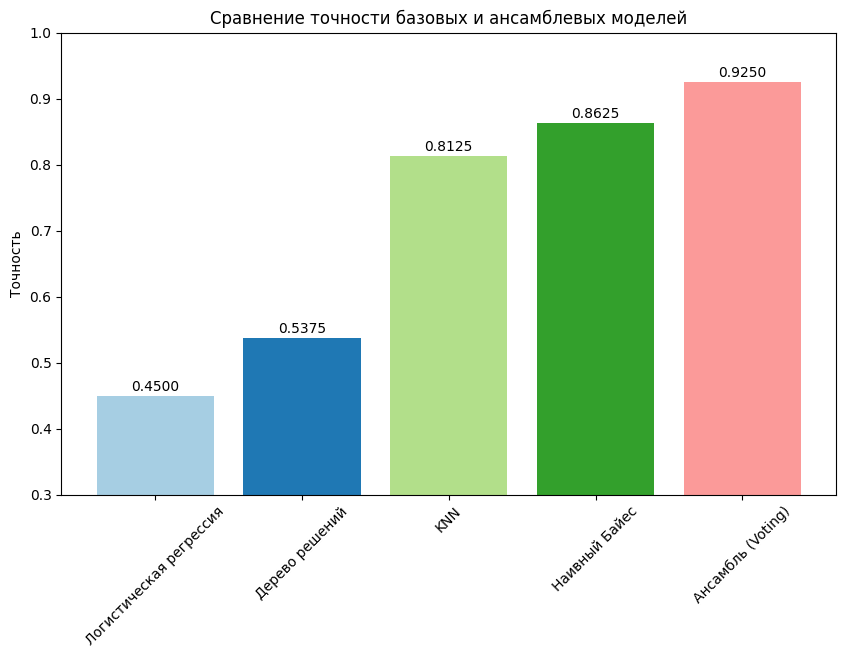

In [ ]:
# Визуализация производительности моделей
# Построение столбчатой диаграммы точности моделей
plt.figure(figsize=(10, 6))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=plt.cm.Paired(range(len(accuracies))))
plt.title('Сравнение точности базовых и ансамблевых моделей')
plt.ylabel('Точность')
plt.ylim([0.3, 1.0])

# Отображение значений точности над столбцами
for bar, accuracy in zip(bars, accuracies.values()):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.003, f'{accuracy:.4f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

Text(0.5, 1.0, 'Ансамбль (Voting)')

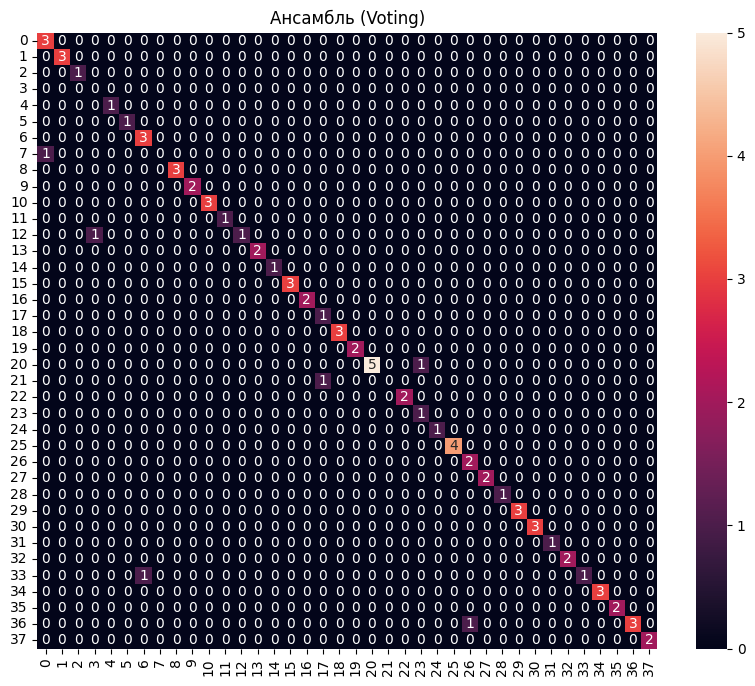

In [ ]:
y_pred = model.predict(X_test_scaled)
conf_mat_voting=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat_voting,annot=True,fmt='d')
plt.title('Ансамбль (Voting)')

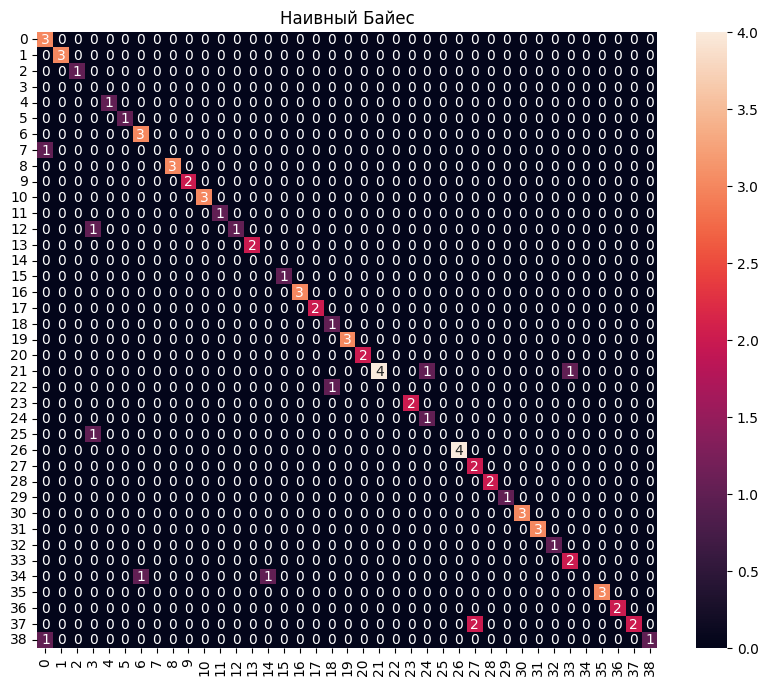

In [ ]:
for name, model in models.items():
    if name == 'Наивный Байес':
        # Предсказание для тестовых данных
        y_pred_nb = model.predict(X_test_flat)  # Используем плоские данные для дерева решений
        # Вычисляем матрицу ошибок
        conf_mat_nb = confusion_matrix(y_test, y_pred_nb)
        plt.figure(figsize=(10, 8))
        sns.heatmap(conf_mat_nb, annot=True, fmt='d')
        plt.title('Наивный Байес')
        plt.show()

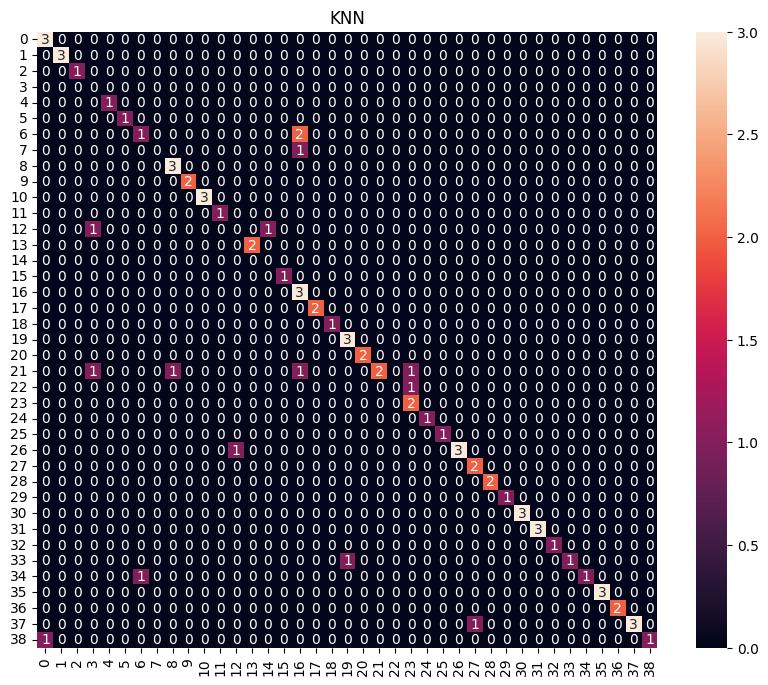

In [ ]:
for name, model in models.items():
    if name == 'KNN':
        # Предсказание для тестовых данных
        y_pred_knn = model.predict(X_test_flat)  # Используем плоские данные для дерева решений
        # Вычисляем матрицу ошибок
        conf_mat_knn = confusion_matrix(y_test, y_pred_knn)
        plt.figure(figsize=(10, 8))
        sns.heatmap(conf_mat_knn, annot=True, fmt='d')
        plt.title('KNN')
        plt.show()

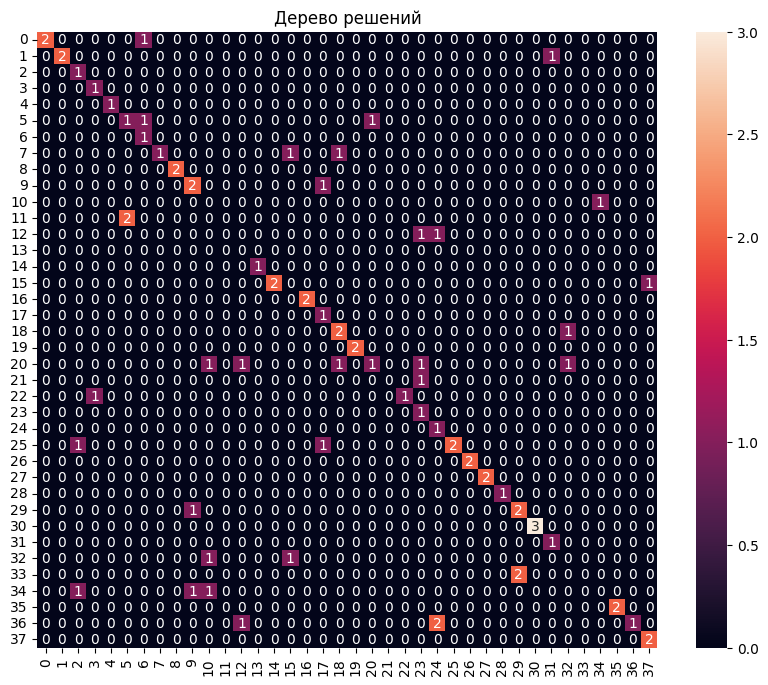

In [ ]:
for name, model in models.items():
    if name == 'Дерево решений':
        # Предсказание для тестовых данных
        y_pred_dt = model.predict(X_test_flat)  # Используем плоские данные для дерева решений
        # Вычисляем матрицу ошибок
        conf_mat_dt = confusion_matrix(y_test, y_pred_dt)
        plt.figure(figsize=(10, 8))
        sns.heatmap(conf_mat_dt, annot=True, fmt='d')
        plt.title('Дерево решений')
        plt.show()

Text(0.5, 1.0, 'Логистическая регрессия')

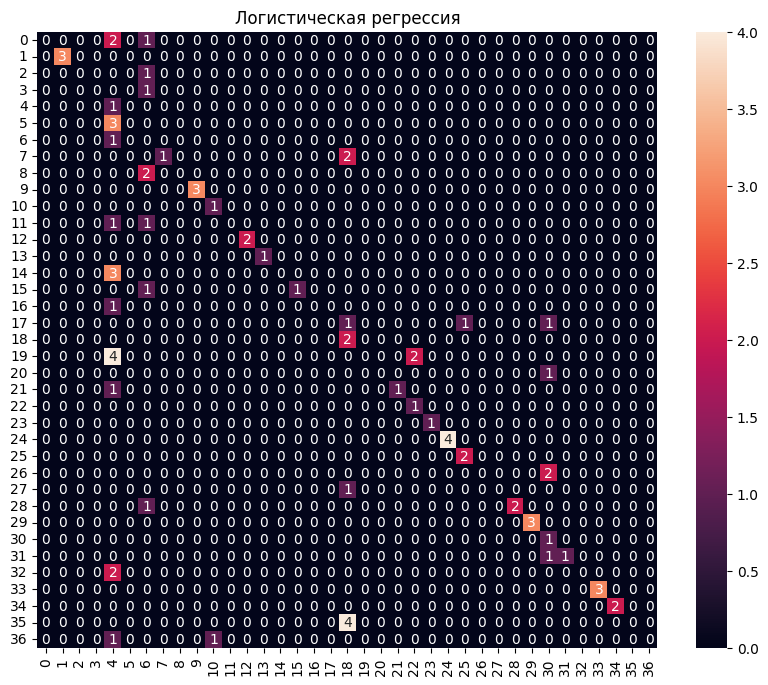

In [ ]:
y_pred_log_reg = log_reg.predict(X_test_scaled)
conf_mat_log_reg=confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat_log_reg,annot=True,fmt='d')
plt.title('Логистическая регрессия')

## **Задание №4: Классификация лиц из набора Olivetti Faces с помощью ансамбля классификаторов** [**StackingClassifier**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html)



- В этом задании мы применим ансамблевый метод классификации StackingClassifier из библиотеки scikit-learn для решения задачи распознавания лиц из набора данных Olivetti Faces. StackingClassifier объединяет предсказания нескольких базовых классификаторов путем обучения метаклассификатора на их выходах, что позволяет улучшить качество классификации по сравнению с отдельными моделями и методом голосования VotingClassifier.


- Мы будем использовать несколько "слабых" классификаторов первого уровня, таких как LogisticRegression, DecisionTreeClassifier, KNeighborsClassifier и GaussianNB. Затем мы обучим метаклассификатор второго уровня (например, LogisticRegression или SVC) на выходах классификаторов первого уровня. Метаклассификатор будет учиться комбинировать предсказания базовых моделей оптимальным образом.




- Не забудьте предварительно обработать изображения перед подачей в модели:
  - Преобразовать изображения в вектора признаков (flatten)
  - Нормализовать значения пикселей (разделить на 255)

- После обучения, оцените качество классификации каждой модели на тестовой выборке, используя метрику accuracy, отчет классификации и построение матрицы ошибок.

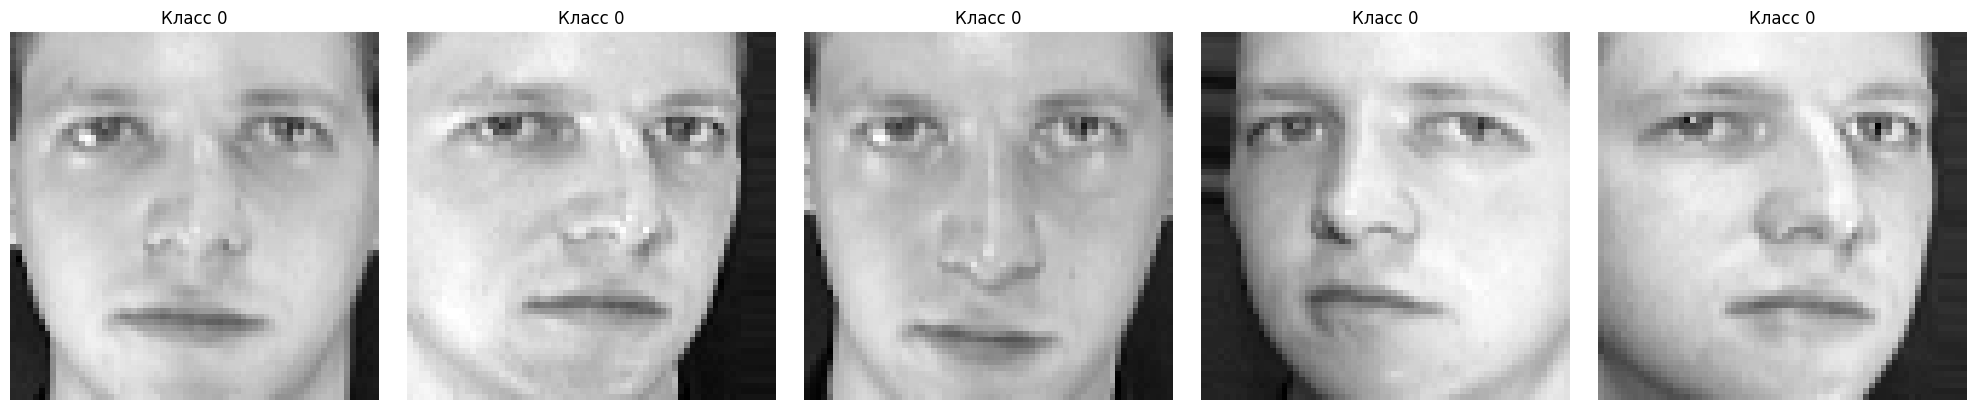

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# Загрузка датасета
faces = fetch_olivetti_faces()
images = faces.images  # Изображения размером 64x64
labels = faces.target  # Метки классов (номера людей)

# Отображение первых пяти изображений и их классов
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

for i in range(5):
    image = images[i]
    label = labels[i]
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f'Класс {label}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Разделение данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
X = faces.images
y = faces.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_flat = X_test.reshape(X_test.shape[0], -1) / 255.0

X_train_flat.shape

(320, 4096)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Стандартизация признаков для моделей, чувствительных к масштабу
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_test_scaled = scaler.transform(X_test_flat)

In [ ]:
# Определение базовых моделей и мета-модели
base_models = [
    ('log_reg', LogisticRegression()),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('gnb', GaussianNB())
]

# Мета-модель
meta_model = LogisticRegression()

# Создание регрессора стекинга
stacking_classifier = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    #cv=KFold(n_splits=5, shuffle=True, random_state=42)
)

In [ ]:
# Обучение классификатора стекинга
stacking_classifier.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


StackingClassifier(estimators=[('log_reg', LogisticRegression()),
                               ('dt', DecisionTreeClassifier(random_state=42)),
                               ('knn', KNeighborsClassifier()),
                               ('gnb', GaussianNB())],
                   final_estimator=LogisticRegression())

In [ ]:
# Предсказания регрессора стекинга на тестовых данных и оценка точности
stacking_pred = stacking_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, stacking_pred)
print(f"Точность StackingClassifier: {accuracy:.4f}")

Точность StackingClassifier: 0.9125


In [ ]:
# Оценка базовых моделей
for name, model in base_models:
    # Обучение
    model.fit(X_train_scaled, y_train)
    # Предсказания на тестовых данных
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Точность ({name}): {accuracy:.4f}")

Точность (log_reg): 0.9500
Точность (dt): 0.5250
Точность (knn): 0.7875
Точность (gnb): 0.8625


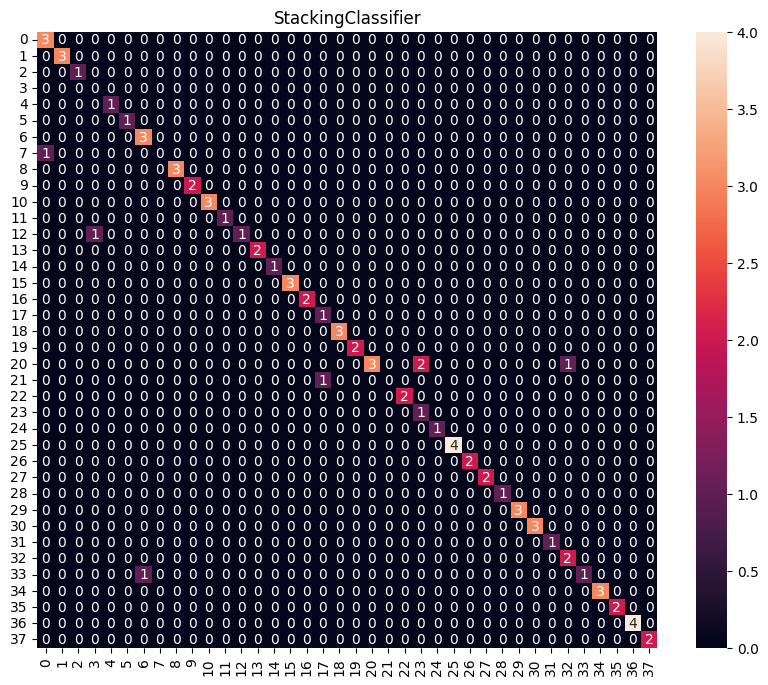

In [ ]:
conf_mat=confusion_matrix(y_test, stacking_pred)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat,annot=True,fmt='d')
plt.title('StackingClassifier')
plt.show()

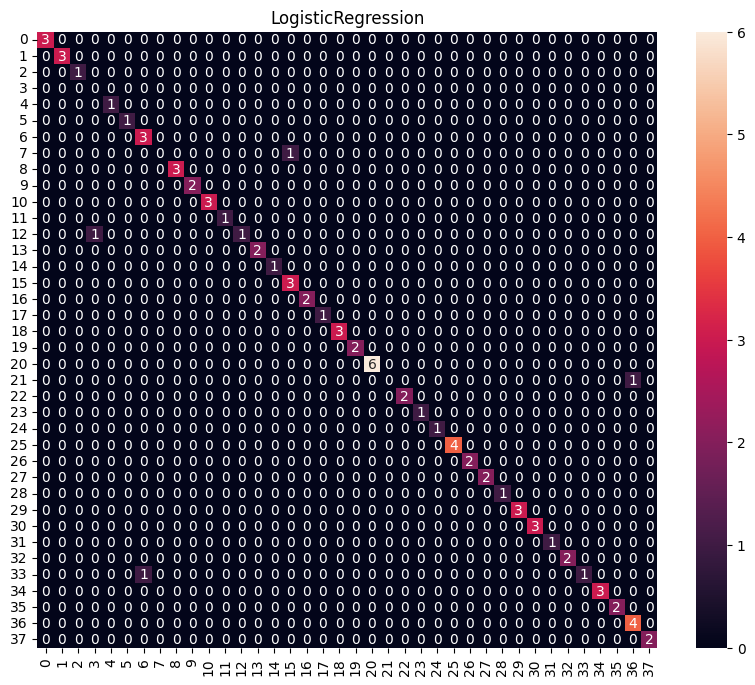

In [ ]:
# Построение матрицы ошибок
for name, model in base_models:
    if name == 'log_reg':
        model.fit(X_train_scaled, y_train)
        y_pred_log_reg = model.predict(X_test_scaled)
        conf_mat_log_reg = confusion_matrix(y_test, y_pred_log_reg)
        plt.figure(figsize=(10,8))
        sns.heatmap(conf_mat_log_reg,annot=True,fmt='d')
        plt.title('LogisticRegression')
        plt.show()

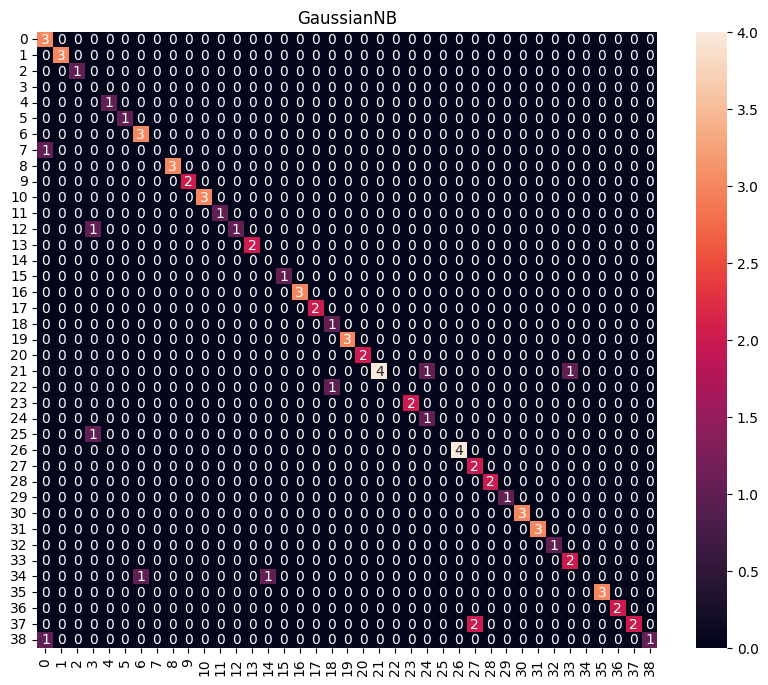

In [ ]:
for name, model in base_models:
    if name == 'gnb':
        model.fit(X_train_scaled, y_train)
        y_pred_gnb = model.predict(X_test_scaled)
        conf_mat_gnb = confusion_matrix(y_test, y_pred_gnb)
        plt.figure(figsize=(10,8))
        sns.heatmap(conf_mat_gnb,annot=True,fmt='d')
        plt.title('GaussianNB')
        plt.show()

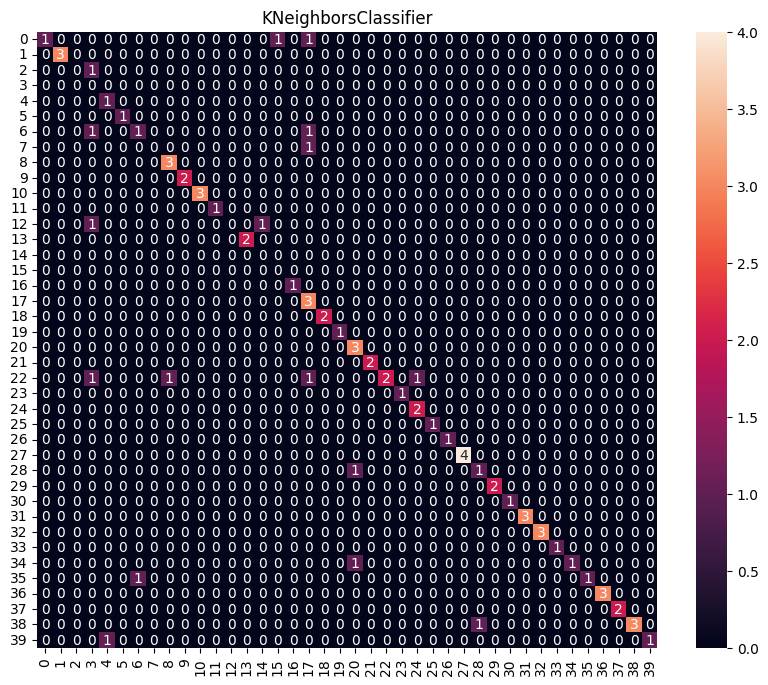

In [ ]:
for name, model in base_models:
    if name == 'knn':
        model.fit(X_train_scaled, y_train)
        y_pred_knn = model.predict(X_test_scaled)
        conf_mat_knn = confusion_matrix(y_test, y_pred_knn)
        plt.figure(figsize=(10,8))
        sns.heatmap(conf_mat_knn,annot=True,fmt='d')
        plt.title('KNeighborsClassifier')
        plt.show()

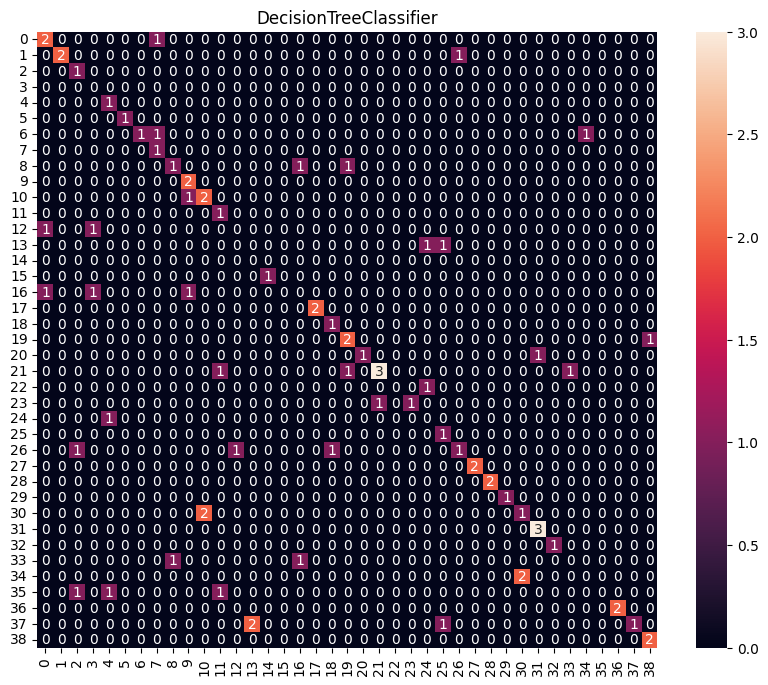

In [ ]:
for name, model in base_models:
    if name == 'dt':
        model.fit(X_train_scaled, y_train)
        y_pred_dt = model.predict(X_test_scaled)
        conf_mat_dt = confusion_matrix(y_test, y_pred_dt)
        plt.figure(figsize=(10,8))
        sns.heatmap(conf_mat_dt,annot=True,fmt='d')
        plt.title('DecisionTreeClassifier')
        plt.show()